<a href="https://colab.research.google.com/github/Charishma-Kandregula/Cognifyz-Tasks/blob/main/Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Level 2 - Task 1:-

## Task: Table Booking and Online Delivery

##### 1. Determine the percentage of restaurants that offer table booking and online delivery.

In [1]:
import pandas as pd
a = pd.read_csv('/content/Dataset .csv')

In [2]:
print(a.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [3]:
table_booking_percentage = (a['Has Table booking'].value_counts()[1] / a.shape[0]) * 100
online_delivery_percentage = (a['Has Online delivery'].value_counts()[1] / a.shape[0]) * 100
print(f"Percentage of restaurants with table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants with online delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants with table booking: 12.12%
Percentage of restaurants with online delivery: 25.66%


##### 2. Compare the average ratings of restaurants with table booking and those without.

In [6]:
average_rating_with_booking = a[a['Has Table booking'] == 1]['Aggregate rating'].mean()
average_rating_without_booking = a[a['Has Table booking'] == 0]['Aggregate rating'].mean()
print(f"Average rating of restaurants with table booking:{average_rating_with_booking:.2f}")
print(f"Average rating of restaurants without table booking:{average_rating_without_booking:.2f}")


Average rating of restaurants with table booking:nan
Average rating of restaurants without table booking:nan


##### 3. Analyze the availability of online delivery among restaurants with different price ranges.

In [9]:
for price_range in a['Price range'].unique():
   online_delivery_count = a[(a['Price range'] == price_range) & (a['Has Online delivery'] == 1)].shape[0]
   total_count = a[a['Price range'] == price_range].shape[0]
   online_delivery_percentage = (online_delivery_count / total_count) * 100
   print(f"Restaurants with price range {price_range}: {online_delivery_percentage:.2f}% offer online delivery.")

Restaurants with price range 3: 0.00% offer online delivery.
Restaurants with price range 4: 0.00% offer online delivery.
Restaurants with price range 2: 0.00% offer online delivery.
Restaurants with price range 1: 0.00% offer online delivery.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

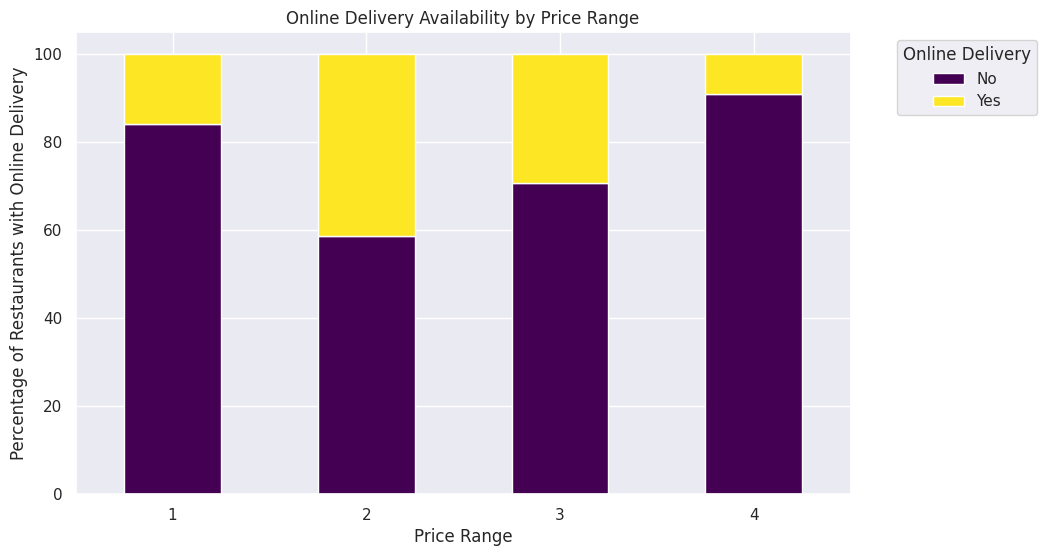

In [13]:
# Group by 'Price range' and calculate the percentage of restaurants with online delivery

Online_Delivery_by_price_range = a.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100

Online_Delivery_by_price_range.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery')
plt.xticks(rotation = 0)
plt.legend(title='Online Delivery', bbox_to_anchor=(1.05, 1))

plt.show()

# Level 2 - Task 2:-

## Task: Price Range Analysis

##### 1. Determine the most common price range among all the restaurants.

In [14]:
most_common_price_range = a['Price range'].value_counts().index[0]
print(f"Most common price range: {most_common_price_range}")


Most common price range: 1


##### 2. Calculate the average rating for each price range.

    & Identify the color that represents the highest average rating among different price ranges.

In [15]:
average_ratings_by_price = a.groupby('Price range')['Aggregate rating'].mean()
print(f"Average rating by price range:\n{average_ratings_by_price}")


Average rating by price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [16]:
highest_rating = average_ratings_by_price.max()
highest_rated_price_range = average_ratings_by_price.idxmax()
color_map = {
'1': 'green',
'2': 'yellow',
'3': 'orange',
'4': 'red'
}
highest_rated_color = color_map.get(highest_rated_price_range)
print(f"Color representing highest average rating: {highest_rated_color}")

Color representing highest average rating: None


# Level 2 - Task 3:-

## Task: Feature Engineering

##### 1. Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [18]:
# Extract the length of the restaurant name and address and create new columns

a['Restaurant Name Length'] = a['Restaurant Name'].apply(lambda x: len(str(x)))

a['Address Length'] = a['Address'].apply(lambda x: len(str(x)))

In [20]:
a[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']]

,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64
...,...,...,...,...
9546,Naml۱ Gurme,11,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",103
9547,Ceviz A��ac۱,12,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",77
9548,Huqqa,5,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",73
9549,A���k Kahve,11,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",75


##### 2. Create new features like "Has Table Booking"or "Has Online Delivery" by encoding categorical variables.

In [22]:
# Creating new features "Has Table Booking" and "Has Online Delivery"

a['Has Table Booking'] = a['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

a['Has Online Delivery'] = a['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [23]:
a[['Has Table booking', 'Has Table Booking', 'Has Online delivery', 'Has Online Delivery']]

,Has Table booking,Has Table Booking,Has Online delivery,Has Online Delivery
0,Yes,1,No,0
1,Yes,1,No,0
2,Yes,1,No,0
3,No,0,No,0
4,Yes,1,No,0
...,...,...,...,...
9546,No,0,No,0
9547,No,0,No,0
9548,No,0,No,0
9549,No,0,No,0


-  Two new columns added, 'Restaurant Name length' and 'Address Length' from the length of the restaurant name or address
-  And also two new binary column added by encoding categorical variables, 'Has Table booking' and 'Has Online delivery'